# Explore resampling timeseries
Stefan/Yuzhao Heng
Since Mon. Nov. 8th, 2021


Potentially, 12-lead ECG signals of different sample frequency need to be unified into the same frequency, how?



## Setup
Get an example signals and try resampling


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from icecream import ic
import wfdb
from wfdb import processing

from util import *


path = '../../datasets'
dset = 'St-Petersburg-INCART'
fnm = 'I01'
fnm = f'{path}/{dset}/{fnm}'
sampto = 2 ** 10
rec = wfdb.rdrecord(fnm, sampto=sampto)
ic(rec.fs)  # Sampling frequency

sig = rec.p_signal[:, 0]
ic(sig.shape)


duration = 4
x = np.arange(0, duration, 1 / 10)
vals = np.sin(x)
ic(x, vals.shape)



ic| rec.fs: 257
ic| sig.shape: (1024,)
ic| x: array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
              1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
              2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
              3.9])
    vals.shape: (40,)


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9]),
 (40,))

## Sin wave
With `numpy.interp`

### Up-sample


ic| x_new: array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
                  0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
                  0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
                  1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72,
                  1.76, 1.8 , 1.84, 1.88, 1.92, 1.96, 2.  , 2.04, 2.08, 2.12, 2.16,
                  2.2 , 2.24, 2.28, 2.32, 2.36, 2.4 , 2.44, 2.48, 2.52, 2.56, 2.6 ,
                  2.64, 2.68, 2.72, 2.76, 2.8 , 2.84, 2.88, 2.92, 2.96, 3.  , 3.04,
                  3.08, 3.12, 3.16, 3.2 , 3.24, 3.28, 3.32, 3.36, 3.4 , 3.44, 3.48,
                  3.52, 3.56, 3.6 , 3.64, 3.68, 3.72, 3.76, 3.8 , 3.84, 3.88, 3.92,
                  3.96])
    vals_inter.shape: (100,)


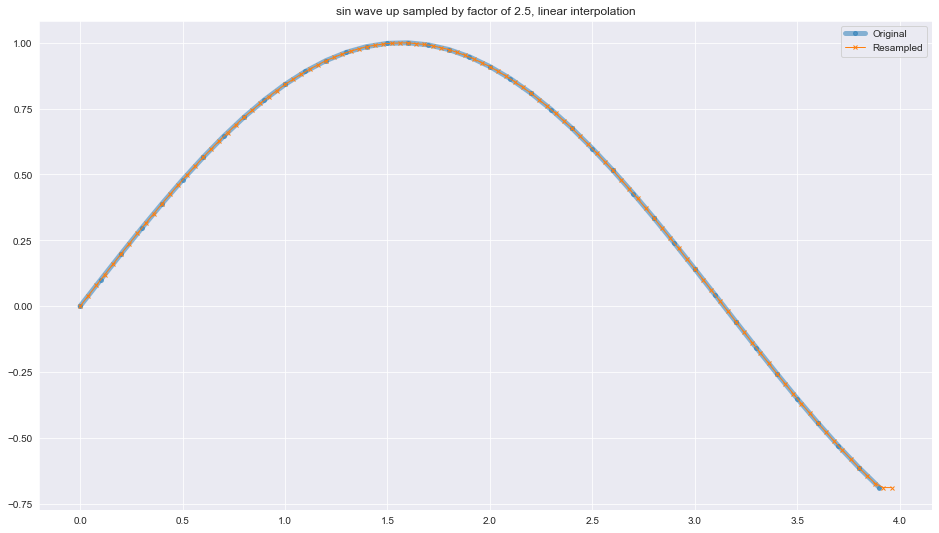

In [3]:
x_new = np.arange(0, duration, 1 / 25)
vals_inter = np.interp(x_new, x, vals)
ic(x_new, vals_inter.shape)

plot_resampling(x, vals, x_new, vals_inter, 'sin wave up sampled by factor of 2.5, linear interpolation')



### Down-sample


ic| x_new: array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
                  2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8])
    vals_inter.shape: (20,)


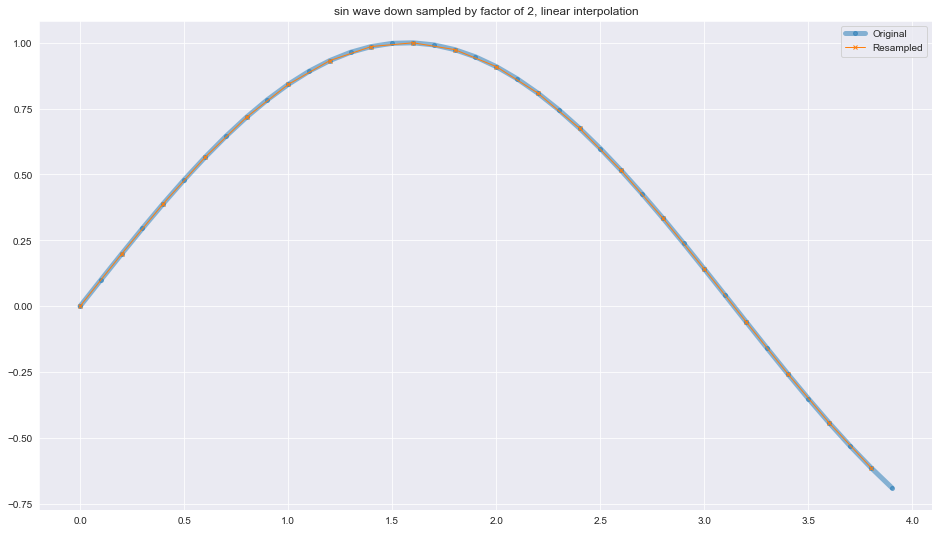

In [4]:
x_new = np.arange(0, duration, 1 / 5)
vals_inter = np.interp(x_new, x, vals)
ic(x_new, vals_inter.shape)

plot_resampling(x, vals, x_new, vals_inter, 'sin wave down sampled by factor of 2, linear interpolation')



## ECG signal

### Down-sample
We observe some info loss, e.g. at the R-peak for linear interpolation;
while the resampling implementation by `wfdb` is better in terms of R peak - it calls the `scipy.resample` which uses fourier method



ic| final: 0.9961089494163424
ic| x_ori.shape: (256,)
ic| x_new: array([0.   , 0.008, 0.016, 0.024, 0.032, 0.04 , 0.048, 0.056, 0.064,
                  0.072, 0.08 , 0.088, 0.096, 0.104, 0.112, 0.12 , 0.128, 0.136,
                  0.144, 0.152, 0.16 , 0.168, 0.176, 0.184, 0.192, 0.2  , 0.208,
                  0.216, 0.224, 0.232, 0.24 , 0.248, 0.256, 0.264, 0.272, 0.28 ,
                  0.288, 0.296, 0.304, 0.312, 0.32 , 0.328, 0.336, 0.344, 0.352,
                  0.36 , 0.368, 0.376, 0.384, 0.392, 0.4  , 0.408, 0.416, 0.424,
                  0.432, 0.44 , 0.448, 0.456, 0.464, 0.472, 0.48 , 0.488, 0.496,
                  0.504, 0.512, 0.52 , 0.528, 0.536, 0.544, 0.552, 0.56 , 0.568,
                  0.576, 0.584, 0.592, 0.6  , 0.608, 0.616, 0.624, 0.632, 0.64 ,
                  0.648, 0.656, 0.664, 0.672, 0.68 , 0.688, 0.696, 0.704, 0.712,
                  0.72 , 0.728, 0.736, 0.744, 0.752, 0.76 , 0.768, 0.776, 0.784,
                  0.792, 0.8  , 0.808, 0.816, 0.824, 0.

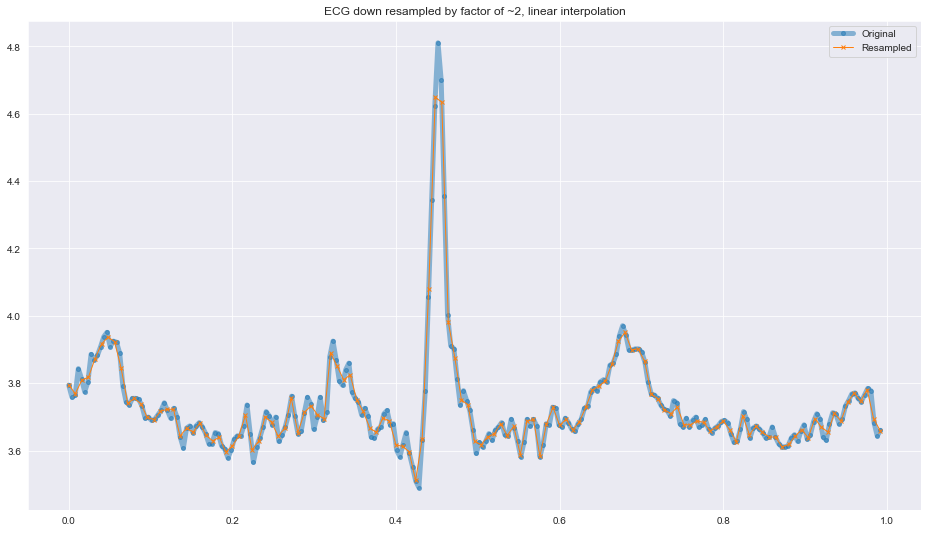

ic| sig_inter.shape: (125,)


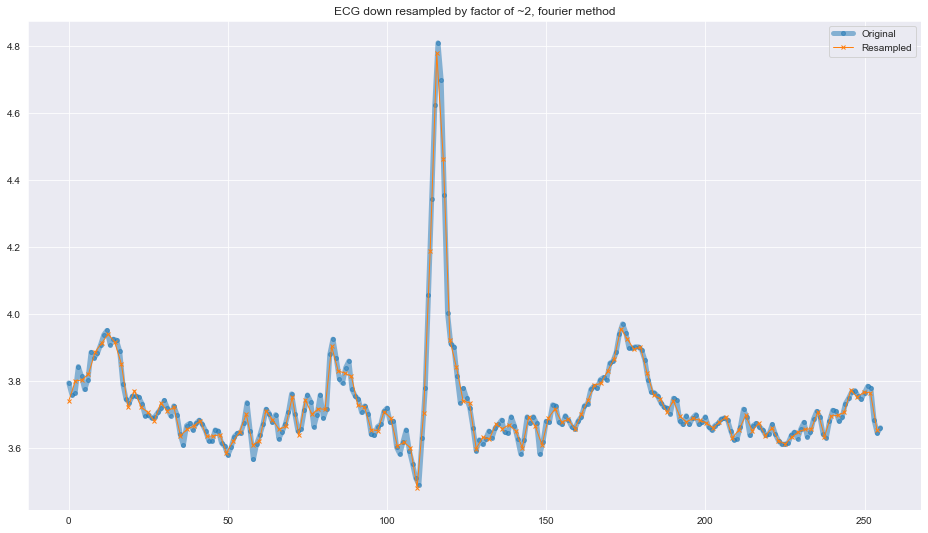

In [7]:
final = sig.size / rec.fs
ic(final)
x_ori = np.arange(0, final, 1 / rec.fs)
ic(x_ori.shape)
x_new = np.arange(0, final, 1 / 125)

sig_inter = np.interp(x_new, x_ori, sig)
ic(x_new, sig_inter.shape)

# Crop
n = 256
x_ori = x_ori[:n]
sig = sig[:n]
x_new = x_new[:n]
sig_inter = sig_inter[:n]
plot_resampling(x_ori, sig, x_new, sig_inter, 'ECG down resampled by factor of ~2, linear interpolation')


sig_inter_, x_new_ = wfdb.processing.resample_sig(sig, rec.fs, 125)
ic(sig_inter.shape)
plot_resampling(np.arange(sig.size), sig, x_new_, sig_inter_, 'ECG down resampled by factor of ~2, fourier method')


### Up-sample


ic| sig_inter.shape: (498,)


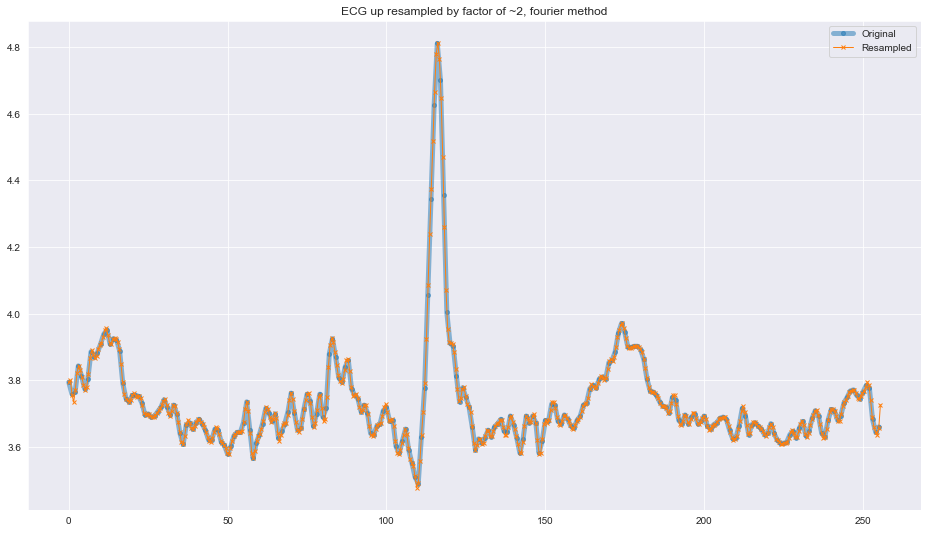

In [6]:
sig_inter, x_new = wfdb.processing.resample_sig(sig, rec.fs, 500)
ic(sig_inter.shape)
plot_resampling(np.arange(sig.size), sig, x_new, sig_inter, 'ECG up resampled by factor of ~2, fourier method')

